**Installing dependencies**

In [1]:
# Install dependencies and initialize
%pip install -qU \
    langchain \
    langchain-community \
    llama-index \
    sentence_transformers \
    pdf2image \
    pdfminer \
    pdfminer.six \
    unstructured \
    faiss-cpu \
    opencv-python \
    unstructured_pytesseract \
    unstructured_inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 13.9 MB/s eta 0:00:

**API Setup**

In [2]:
from getpass import getpass
import os

# Anyscale API key
ANYSCALE_API_KEY = '' #you can generate one by signing up on anyscale.com

os.environ["ANYSCALE_API_BASE"] = "https://api.endpoints.anyscale.com/v1"
os.environ["ANYSCALE_API_KEY"] = ANYSCALE_API_KEY

**LLama 3 - 70B**

In this section, we demonstrate how to integrate and use the ChatAnyscale model from the LangChain library. The model, meta-llama/Meta-Llama-3-70B-Instruct, is designed to generate responses in natural language based on provided prompts.

In [3]:
# description for llama

from langchain.chat_models import ChatAnyscale

llm = ChatAnyscale(model_name='meta-llama/Meta-Llama-3-70B-Instruct', temperature=1.0)

In [4]:
llm

ChatAnyscale(client=<openai.resources.chat.completions.Completions object at 0x7c8edc57afe0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7c8edc5a1150>, model_name='meta-llama/Meta-Llama-3-70B-Instruct', temperature=1.0, openai_proxy='', anyscale_api_key=SecretStr('**********'), available_models={'thenlper/gte-large', 'mistralai/Mistral-7B-Instruct-v0.1', 'google/gemma-7b-it', 'BAAI/bge-large-en-v1.5', 'meta-llama/Meta-Llama-3-8B-Instruct', 'mlabonne/NeuralHermes-2.5-Mistral-7B', 'meta-llama/Meta-Llama-3-70B-Instruct', 'mistralai/Mixtral-8x22B-Instruct-v0.1', 'llava-hf/llava-v1.6-mistral-7b-hf', 'mistralai/Mixtral-8x7B-Instruct-v0.1'})

In [2]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.2-cp39-cp39-macosx_10_9_x86_64.whl (12.6 MB)


In [9]:
import pandas as pd

df1 = pd.read_csv('results/BBC_23072024_llava.csv')
df2 = pd.read_csv('results/BBC_24072024_llava.csv')

# Extract the descriptions
descriptions1 = df1['Description'].tolist()
descriptions2 = df2['Description'].tolist()


**23 July - BBC**

In [10]:
df1.head()

,Index,Image,Description
0,1,0326d4b0-48bd-11ef-9e1c-3b4a473456a6.jpg.webp,The image features a woman standing in front o...
1,2,p0jcz5sq.jpg.webp,The image features a group of four people all...
2,3,68d9f420-48a6-11ef-b74c-bb483a802c97.jpg.webp,The image features a woman wearing a suit and ...
3,4,p0jcydgs.jpg.webp,The image features a man playing a trumpet li...
4,5,e5345030-4827-11ef-96a8-e710c6bfc866.jpg.webp,The image features two men both wearing suits...


**24 July - BBC**

In [11]:
df2.head()

,Index,Image,Description
0,1,5e867400-4917-11ef-a168-7982b5cfc27f.jpg.webp,The image depicts a man with a bloody nose st...
1,2,8a288140-4901-11ef-96a8-e710c6bfc866.jpg.webp,The image features a woman and a young girl st...
2,3,cdd3e9f0-4985-11ef-94ca-096ce5c0c136.jpg.webp,The image features a woman wearing a suit and ...
3,4,50a30f00-498b-11ef-aada-8989b38db4a8.jpg.webp,The image depicts a scene of a boat crashing i...
4,5,512b9200-4961-11ef-aeaa-2da197a7b7d2.png.webp,The image features a large blue sign with a pi...


In [32]:
# Function to generate the prompt for comparison
import re

def generate_prompt(description1, description2):
    prompt_chat = f"""
        You will be given descriptions of two images. Your task is to compare the semantic meanings or ideas represented by these images.
        Provide a similarity score between 0 and 1, where 0 means no similarity and 1 means identical meanings.
        Focus on the underlying concepts and themes rather than specific visual details or objects.

        Format your response as follows:
        Similarity: [score]
        Rationale: [explanation]

        Image 1: {description1}
        Image 2: {description2}
    """
    return prompt_chat
    # return f"Compare the ideas or meanings represented by the following two image descriptions. Rate their similarity on a scale of 0.1 to 1.0, where 0.1 means the images are completely different and 1.0 means the images are completely in agreement and can be substituted for other.\n\nImage 1: {caption1}\nImage 2: {caption2}\n\nSimilarity: Give answer in the format "

# Function to get response and similarity score from the LLM model
def get_response_and_similarity_score(prompt):
    response = llm.predict(prompt)
    # Extract the similarity score from the response
    # Adjust the following line based on the actual response format
    pattern = r"Similarity:\s*([\d\.]+)"
    match = re.search(pattern, response)
    if match:
        similarity_score = float(match.group(1))
    else:
        similarity_score = None
    print(response)
    return response, similarity_score

# Compute the similarity matrix
similarity_matrix = []
responses = []

for desc1 in descriptions1[:7]:
    row = []
    resp = []
    for desc2 in descriptions2[:7]:
        prompt = generate_prompt(desc1, desc2)
        response, similarity_score = get_response_and_similarity_score(prompt)
        resp.append(response)
        row.append(similarity_score)
    similarity_matrix.append(row)
    responses.append(resp)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Similarity: 0.2
Rationale: While both images depict a central figure surrounded by other people, the underlying concepts and themes are quite different. Image 1 represents a scene of authority, leadership, and public importance, as evidenced by the presidential seal and the woman giving a speech. The atmosphere is formal and serious, suggesting a dignified event. In contrast, Image 2 depicts a scene of distress, concern, and urgency, with a focus on the man's injury and the crowd's reaction to it. The tone is more chaotic and emotional. While both images feature a central figure and a surrounding crowd, the contexts and emotions conveyed are distinct, leading to a low similarity score.
Similarity: 0.2
Rationale: The two images represent different concepts and themes. Image 1 conveys a sense of power, authority, and public significance, as evident from the presence of the presidential seal and the woman giving a speech. The scene suggests a formal event of importance, potentially relate

In [33]:
# Convert the similarity matrix to a DataFrame for better visualization

similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6
0,0.2,0.2,0.9,0.2,0.4,0.2,0.7
1,0.2,0.8,0.2,0.0,0.2,0.2,0.2
2,0.1,0.2,0.8,0.1,0.2,0.2,0.8
3,0.1,0.2,0.6,0.1,0.1,0.2,0.4
4,0.1,0.4,0.6,0.0,0.2,0.0,0.4
5,0.2,0.4,0.2,0.1,0.2,0.2,0.2
6,0.1,0.2,0.4,0.0,0.2,0.2,0.2


In [34]:
indices = similarity_df[similarity_df >= 0.8].stack().index.tolist()
indices

[(0, 2), (1, 1), (2, 2), (2, 6)]

In [36]:
description_pairs = [(descriptions1[idx1], descriptions2[idx2]) for idx1, idx2 in indices]

In [38]:
df_descriptions = pd.DataFrame(description_pairs, columns=['Description 1', 'Description 2'])
df_descriptions.head()

,Description 1,Description 2
0,The image features a woman standing in front o...,The image features a woman wearing a suit and ...
1,The image features a group of four people all...,The image features a woman and a young girl st...
2,The image features a woman wearing a suit and ...,The image features a woman wearing a suit and ...
3,The image features a woman wearing a suit and ...,The image features a woman wearing a white shi...


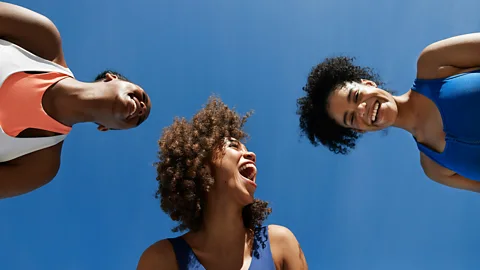

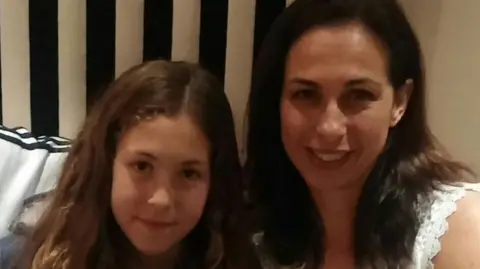

In [53]:
from PIL import Image
from IPython.display import display, HTML

display(HTML(f"<h2>Similarity: {similarity_df.iloc[1, 1]}</h2>"))

display(HTML(f"<p>{df1['Description'][1]}</p>"))
display(Image.open(f"dataset/23_July_News/BBC_23072024/{df1['Image'][1]}"))

display(HTML(f"<p>{df2['Description'][1]}</p>"))
display(Image.open(f"dataset/24_July_News/BBC_24072024/{df2['Image'][1]}"))

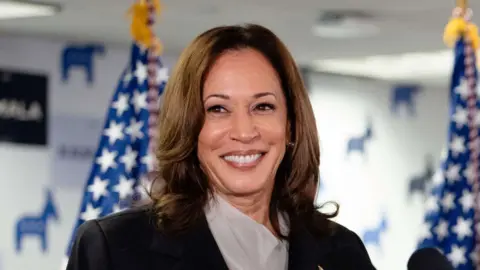

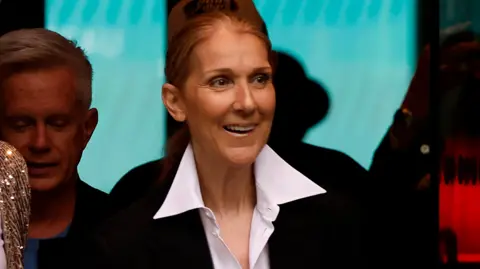

In [55]:
from PIL import Image
from IPython.display import display, HTML

display(HTML(f"<h2>Similarity: {similarity_df.iloc[2, 6]}</h2>"))

display(HTML(f"<p>{df1['Description'][2]}</p>"))
display(Image.open(f"dataset/23_July_News/BBC_23072024/{df1['Image'][2]}"))

display(HTML(f"<p>{df2['Description'][6]}</p>"))
display(Image.open(f"dataset/24_July_News/BBC_24072024/{df2['Image'][6]}"))

In [ ]:
from PIL import Image
from IPython.display import display, HTML

display(HTML(f"<h2>Similarity: {similarity_df.iloc[1, 1]}</h2>"))

display(HTML(f"<p>{df1['Description'][1]}</p>"))
display(Image.open(f"dataset/23_July_News/BBC_23072024/{df1['Image'][1]}"))

display(HTML(f"<p>{df2['Description'][1]}</p>"))
display(Image.open(f"dataset/24_July_News/BBC_24072024/{df2['Image'][1]}"))

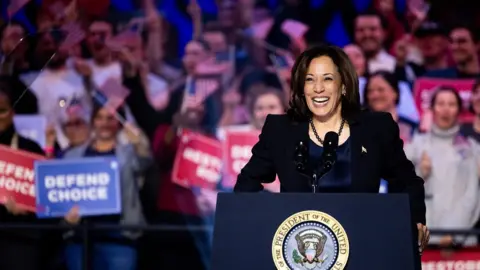

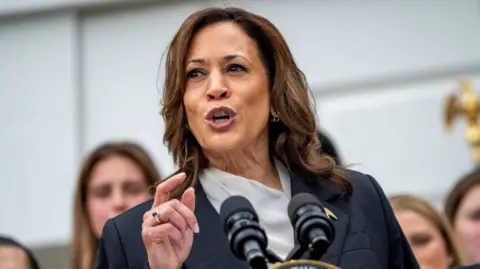

In [49]:
from PIL import Image
from IPython.display import display, HTML

display(HTML(f"<h2>Similarity: {similarity_df.iloc[0, 2]}</h2>"))

display(HTML(f"<b>{df1['Description'][0]}</b>"))
display(Image.open(f"dataset/23_July_News/BBC_23072024/{df1['Image'][0]}"))

display(HTML(f"<b>{df2['Description'][2]}</b>"))
display(Image.open(f"dataset/24_July_News/BBC_24072024/{df2['Image'][2]}"))

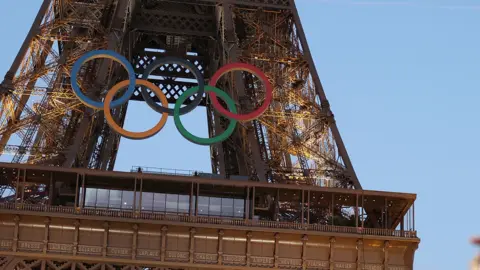

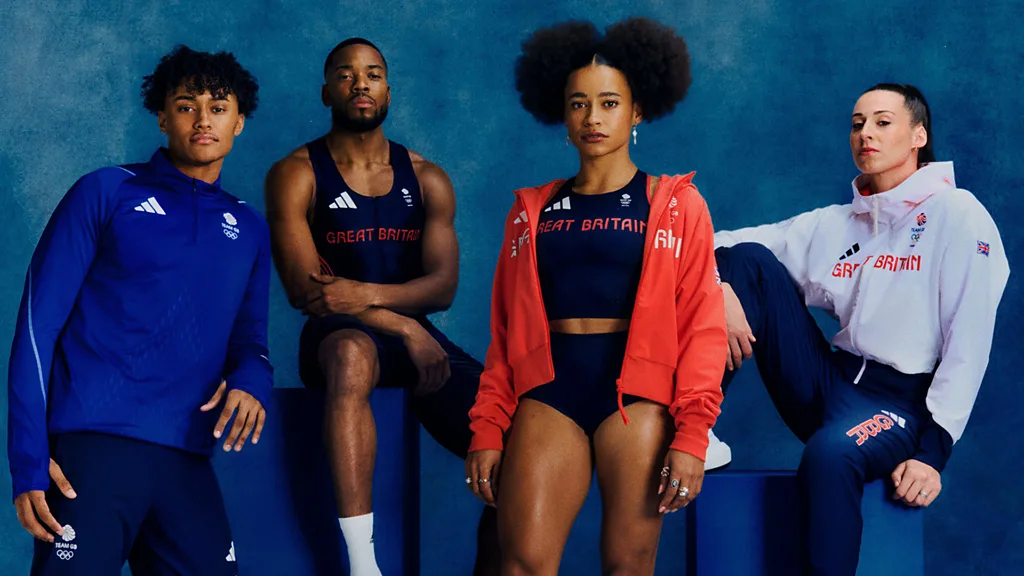

In [ ]:
from PIL import Image
from IPython.display import display, HTML

display(HTML(f"<h3>{df1['Caption'][9]}</h3>"))
display(Image.open(f"dataset/23_July_News/BBC_23072024/{df1['Image'][9]}"))

display(HTML(f"<h3>{df2['Caption'][14]}</h3>"))
display(Image.open(f"dataset/24_July_News/BBC_24072024/{df2['Image'][14]}"))

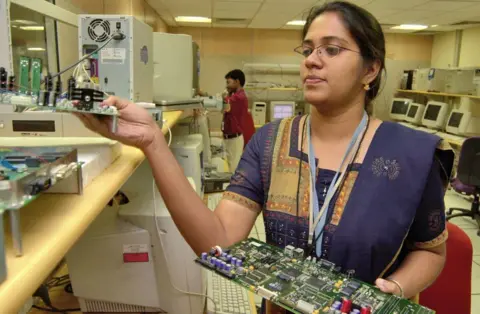

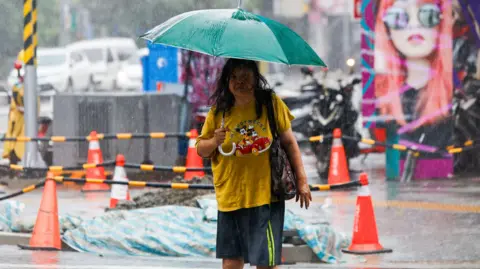

In [50]:
from PIL import Image
from IPython.display import display, HTML

display(HTML(f"<h2>Similarity: {similarity_df.iloc[6, 5]}</h2>"))

display(HTML(f"<p>{df1['Description'][6]}</p>"))
display(Image.open(f"dataset/23_July_News/BBC_23072024/{df1['Image'][6]}"))

display(HTML(f"<p>{df2['Description'][5]}</p>"))
display(Image.open(f"dataset/24_July_News/BBC_24072024/{df2['Image'][5]}"))

In [ ]:
from IPython.display import Markdown, display

prompt_chat = f"""
I will be giving you a pair of descriptions, for which we require you to compare the ideas or meanings represented by the images. Give similarity between them (numerical from 0 to 1), but don't focus on visuals, colors and specific objects.

Answer should be in format "Similarity: " "Rationale: "
Image 1: {caption1}
Image 2: {caption2}
"""
output = llm.predict(prompt_chat)

# Display the output as Markdown
display(Markdown(output))

The llama! A majestic and fascinating creature, but, of course, you're curious about its family ties, aren't you? Well, let me enlighten you, my friend! Llamas belong to the wonderful and diverse family of Camelidae, which, as you might expect, includes camels, as well as alpacas, vicuñas, and guanacos. This remarkable family of even-toed ungulates (meaning they have hoofed feet, you see) is believed to have originated in North America, and over time, its various members spread to different parts of the world.

Now, within the Camelidae family, llamas are part of the genus Lama, which, interestingly, is a separate branch from the camel genus. This genus comprises three closely related South American species: the llama (Lama glama), the alpaca (Vicugna pacos), and the guanaco (Lama guanicoe). These three species are thought to have descended from a common ancestor, with the llama being the most domesticated and widely kept of the three.

So, there you have it! That's the llama's family tree in a nutshell – or rather, an enthusiastic, rambling explanation that hopefully satisfied your curiosity!

In [ ]:
prompt = """
User: I am giving you descriptions of 2 images scrapped from a news website. Give similarity between them (numerical from 0 to 1), but don't focus on visuals, colors and specific objects.
Image 1: the book review by the newspaper
Image 2: the daily cover of the book the daily.
"""
output = llm.predict(prompt)

display(Markdown(output))

Interesting!

Based on the captions, I would rate the similarity between the two images as 0.8.

My reasoning is that both captions are related to a newspaper (Image 1 mentions a "book review by the newspaper" and Image 2 mentions "the daily cover of the book the daily", which suggests a connection to a daily newspaper). Additionally, both captions refer to a publication or printed material (a book review and a daily cover). The only thing that differs is the specific focus (book review vs. daily cover), but the overall context is similar.